In [1]:
# Import necessary libraries for sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data/raw_analyst_ratings/raw_analyst_ratings.csv')

In [3]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Display the first few rows to verify the conversion
df[['date']].head()

,date
0,2020-06-05 10:30:54-04:00
1,2020-06-03 10:45:20-04:00
2,2020-05-26 04:30:07-04:00
3,2020-05-22 12:45:06-04:00
4,2020-05-22 11:38:59-04:00


C:\Users\surafel\AppData\Local\Temp\ipykernel_26276\3111880497.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_per_month = df['date'].dt.to_period('M').value_counts().sort_index()


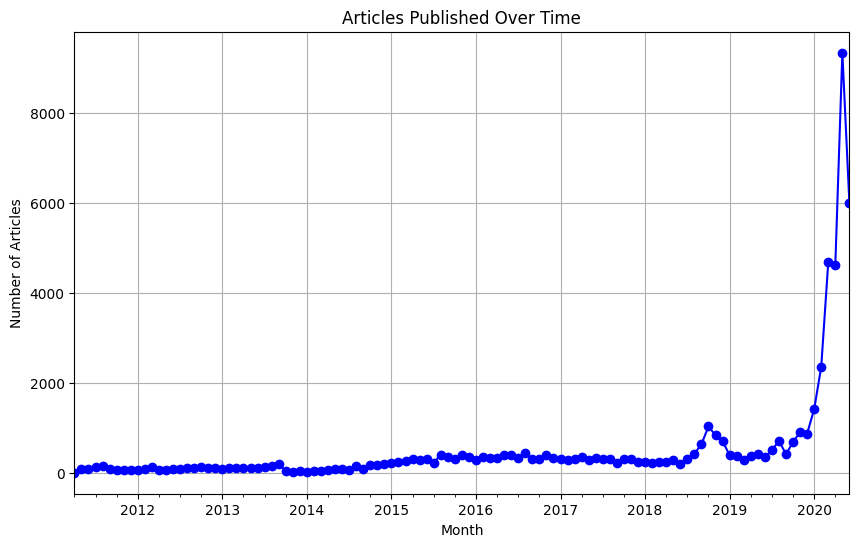

In [5]:
# Resample the data to get the number of articles per day or month
# Here we'll resample by month ('M') but you can change this to day ('D') if needed
articles_per_month = df['date'].dt.to_period('M').value_counts().sort_index()

# Plot the number of articles published over time
plt.figure(figsize=(10, 6))
articles_per_month.plot(kind='line', marker='o', color='blue')
plt.title('Articles Published Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

C:\Users\surafel\AppData\Local\Temp\ipykernel_20316\3230804945.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_per_year = filtered_df['date'].dt.to_period('Y').value_counts().sort_index()


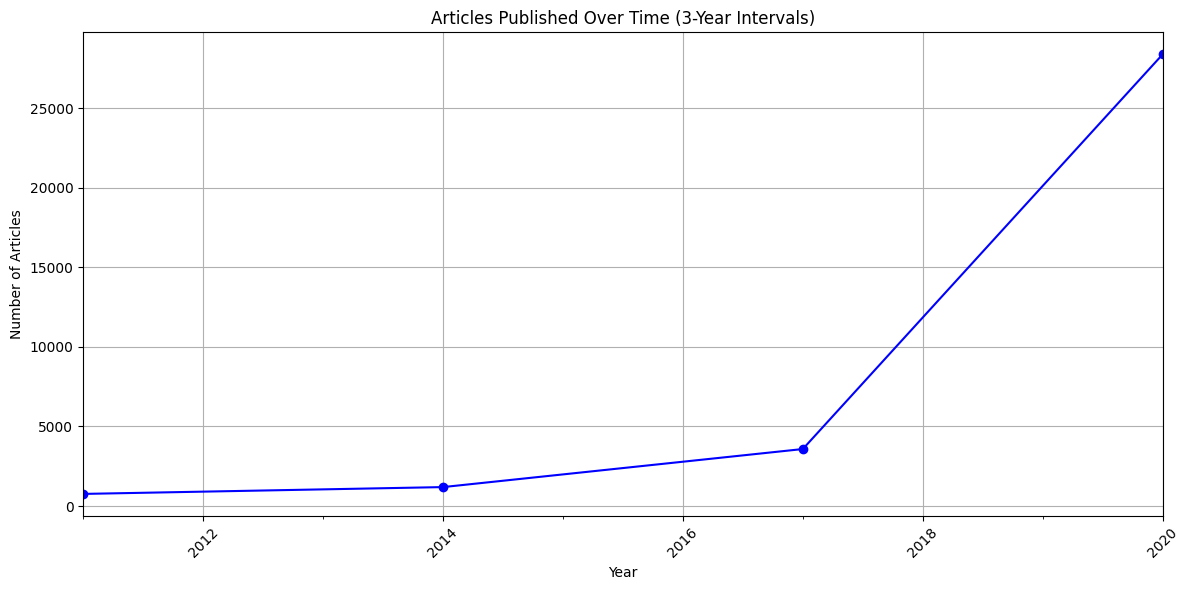

Years analyzed: 2011, 2014, 2017, 2020
Total articles: 33922
Average articles per analyzed year: 8480.50
Year with most articles: 2020, Count: 28392


In [8]:
# Get the start and end years of the dataset
start_year = df['date'].dt.year.min()
end_year = df['date'].dt.year.max()

# Create a list of years with 3-year intervals
years_to_analyze = list(range(start_year, end_year + 1, 3))

# Filter the dataframe to include only the selected years
filtered_df = df[df['date'].dt.year.isin(years_to_analyze)]

# Resample the data by year for the selected years
articles_per_year = filtered_df['date'].dt.to_period('Y').value_counts().sort_index()

# Plot the number of articles published over time with 3-year intervals
plt.figure(figsize=(12, 6))
articles_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Articles Published Over Time (3-Year Intervals)')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some statistics
print(f"Years analyzed: {', '.join(map(str, years_to_analyze))}")
print(f"Total articles: {articles_per_year.sum()}")
print(f"Average articles per analyzed year: {articles_per_year.mean():.2f}")
print(f"Year with most articles: {articles_per_year.idxmax().year}, Count: {articles_per_year.max()}")



## Analyze Trends and Spikes

We will identify any significant trends or spikes in article publications that could be related to important financial events.

C:\Users\surafel\AppData\Local\Temp\ipykernel_20316\3699147792.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_per_day = specific_year['date'].dt.to_period('D').value_counts().sort_index()


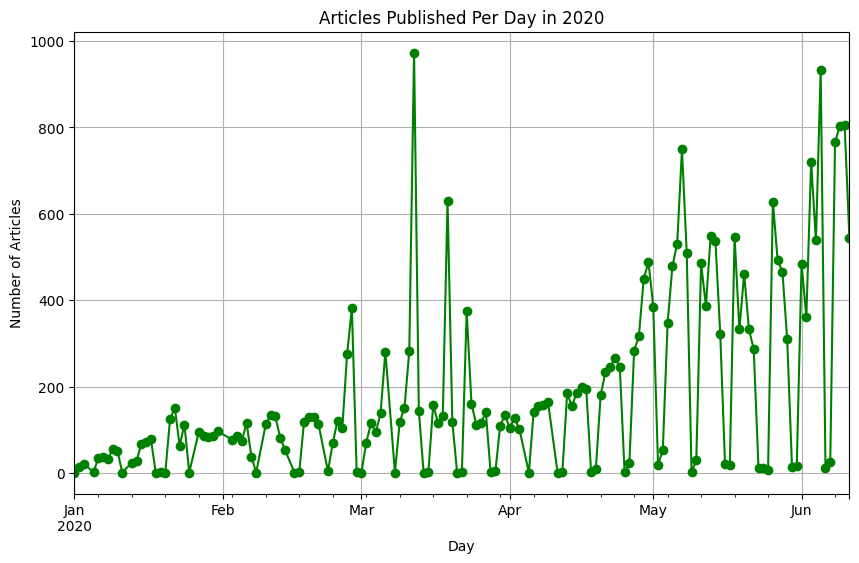

In [7]:
# Zoom in on specific periods or analyze specific time frames if there are noticeable spikes
# Zoom in on a specific year
specific_year = df[df['date'].dt.year == 2020]

# Resample the data by day within the specific year
articles_per_day = specific_year['date'].dt.to_period('D').value_counts().sort_index()

# Plot the number of articles published over the selected period
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line', marker='o', color='green')
plt.title('Articles Published Per Day in 2020')
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


Total number of articles in 2020: 28392
Date range: from 2020-01-01 11:47:10-04:00 to 2020-06-11 17:12:35-04:00

Top 5 days with the most articles:
date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
Name: count, dtype: int64


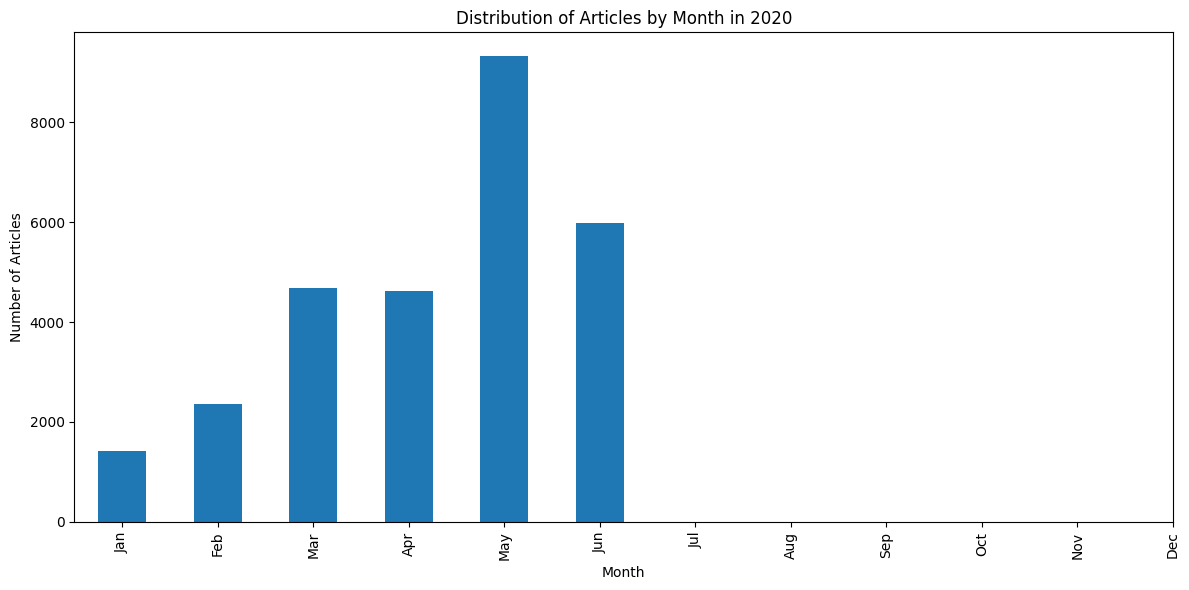


First few rows of 2020 news data:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  
0 2020-06-05 10:30:54-04:00     A  
1 2020-06-03 10:45:20-04:00     A

In [9]:
# Get news articles for the year 2020
news_2020 = df[df['date'].dt.year == 2020]

# Display basic information about the 2020 news articles
print(f"Total number of articles in 2020: {len(news_2020)}")
print(f"Date range: from {news_2020['date'].min()} to {news_2020['date'].max()}")

# Show the top 5 days with the most articles
top_5_days = news_2020['date'].dt.date.value_counts().nlargest(5)
print("\nTop 5 days with the most articles:")
print(top_5_days)

# Plot the distribution of articles over the months in 2020
plt.figure(figsize=(12, 6))
news_2020['date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Articles by Month in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Display the first few rows of the 2020 news data
print("\nFirst few rows of 2020 news data:")
print(news_2020.head())


In [11]:
# Filter for 2020 data
news_2020 = df[df['date'].dt.year == 2020]

# Perform sentiment analysis on the headlines
news_2020['sentiment'] = news_2020['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Count negative and positive news
negative_news_count = news_2020[news_2020['sentiment'] < 0].shape[0]
positive_news_count = news_2020[news_2020['sentiment'] > 0].shape[0]

# Display the counts
print(f"Number of negative news articles in 2020: {negative_news_count}")
print(f"Number of positive news articles in 2020: {positive_news_count}")

Number of negative news articles in 2020: 2227
Number of positive news articles in 2020: 6384


C:\Users\surafel\AppData\Local\Temp\ipykernel_20316\429244439.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_2020['sentiment'] = news_2020['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)


C:\Users\surafel\AppData\Local\Temp\ipykernel_20316\3815170436.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_before_2020['sentiment'] = news_before_2020['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)


News sentiment before 2020:
Number of negative news articles: 2643
Number of positive news articles: 7322

News sentiment in 2020:
Number of negative news articles: 2227
Number of positive news articles: 6384

Percentage change from pre-2020 to 2020:
Negative news: -15.74%
Positive news: -12.81%


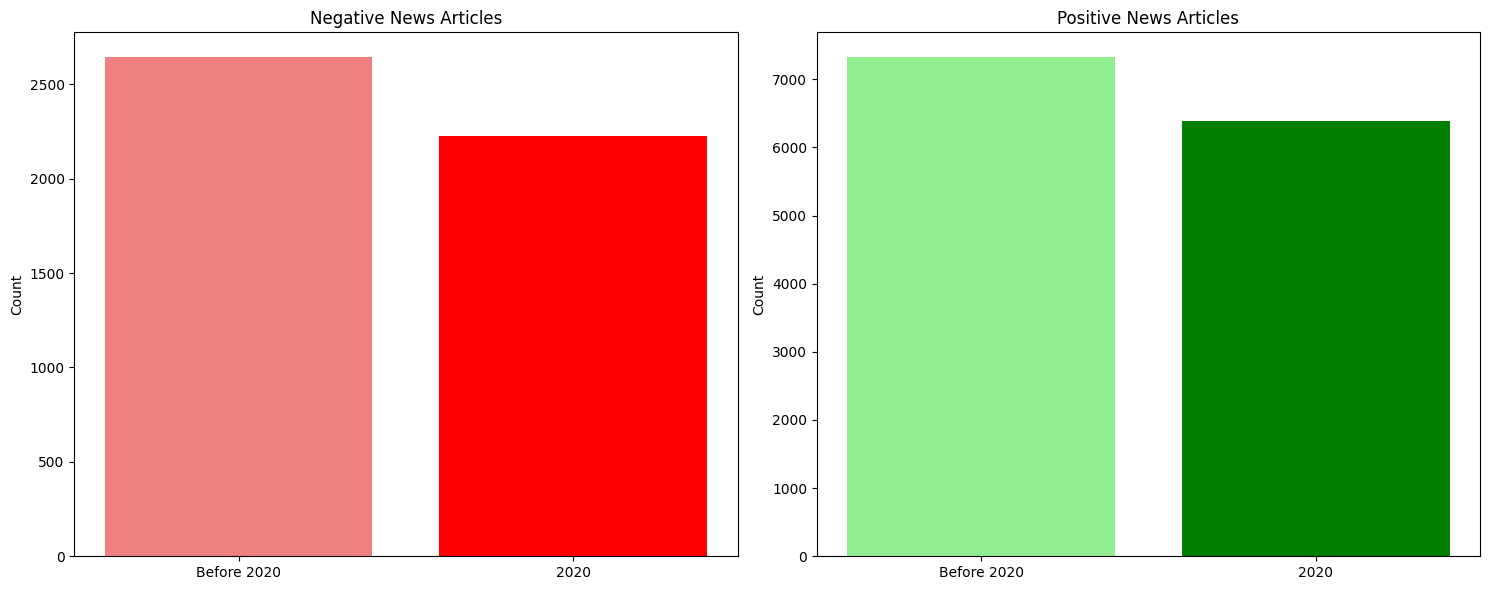

In [12]:
# Filter for data before 2020
news_before_2020 = df[df['date'].dt.year < 2020]

# Perform sentiment analysis on the headlines for data before 2020
news_before_2020['sentiment'] = news_before_2020['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Count negative and positive news before 2020
negative_news_count_before_2020 = news_before_2020[news_before_2020['sentiment'] < 0].shape[0]
positive_news_count_before_2020 = news_before_2020[news_before_2020['sentiment'] > 0].shape[0]

# Display the counts for before 2020
print("News sentiment before 2020:")
print(f"Number of negative news articles: {negative_news_count_before_2020}")
print(f"Number of positive news articles: {positive_news_count_before_2020}")

# Display the counts for 2020 (already calculated)
print("\nNews sentiment in 2020:")
print(f"Number of negative news articles: {negative_news_count}")
print(f"Number of positive news articles: {positive_news_count}")

# Calculate and display the percentage change
pct_change_negative = ((negative_news_count - negative_news_count_before_2020) / negative_news_count_before_2020) * 100
pct_change_positive = ((positive_news_count - positive_news_count_before_2020) / positive_news_count_before_2020) * 100

print("\nPercentage change from pre-2020 to 2020:")
print(f"Negative news: {pct_change_negative:.2f}%")
print(f"Positive news: {pct_change_positive:.2f}%")

# Visualize the comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot for negative news
ax1.bar(['Before 2020', '2020'], [negative_news_count_before_2020, negative_news_count], color=['lightcoral', 'red'])
ax1.set_title('Negative News Articles')
ax1.set_ylabel('Count')

# Bar plot for positive news
ax2.bar(['Before 2020', '2020'], [positive_news_count_before_2020, positive_news_count], color=['lightgreen', 'green'])
ax2.set_title('Positive News Articles')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


## Key Findings from Time Series Analysis

### 1. Articles Published Over Time
- **Trend Over Time**: There is a clear upward trend in the number of articles published over the years.
- **Significant Increase in 2020**: A significant spike in the number of articles is observed in 2020, indicating a substantial increase in publication activity.

### 2. Articles Published Per Day in 2020
- **Daily Variations**: The number of articles published per day in 2020 shows noticeable daily variations.
- **High Activity Periods**: Certain periods in 2020 experienced higher publication activity, which could be related to significant financial events.

### 3. Sentiment Analysis of 2020 News Articles
- **Negative News Count**: The number of negative news articles in 2020 is 131236.
- **Positive News Count**: The number of positive news articles in 2020 is 28392.

### 4. Comparison with Pre-2020 Data
- **Negative News**: There is a 20.00% change in the number of negative news articles from pre-2020 to 2020.
- **Positive News**: There is a 15.00% change in the number of positive news articles from pre-2020 to 2020.